<h3>Proyecto final ISPC</h3>
<h2>Detección y análisis de vehículos por medio de imágenes</h2>



<h4>Objetivos</h4>

<h5>background


<h5>Criterios de aceptación



<h5>Assess situation


<h5>Outputs Inventory of resources

<h5>Risks and contingencies

<h5>Costs and benefits


<h5>Metas de la minería de datos

<h5>Creiterios de aceptación


<h5> Project plan




<img src="Imágenes\3.png">

<h5>Recolección de datos

In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import os
import re

In [ ]:

#correr este código una única vez al menos que se sumen o cambien archivos en datas.

#folder es la carpeta donde se encuentran los csv.
folder = '/content/datas'

#dataframe es la lista donde se van a guardar cada uno de los csv para luego concatenarlos.
dataframes = []

#bucle que toma cada uno de los archivos, crea el dataframe y lo guarda en la lista para luego concatenarlos.
for filename in os.listdir(folder):

    filepath = os.path.join(folder, filename)
    df = pd.read_csv(filepath,sep=";")
    month=filename.split("_")[1]
    month=month.split('.')[0]
    df["month"]=month
    print(f'El archivo {filepath} fue transformado correctamente y se le añadió una columna "month" con el valor {month} en todas sus filas \n')


    dataframes.append(df)

df = pd.concat(dataframes, ignore_index=True)
print("Los archivos csv fueron combinados correctamente \n")


#guardamos la combinación de todos los csv en un archivo para facilitar su uso
filename='combined.csv'
df.to_csv(filename, index=False)
print(f'El archivo {filename} fue creado correctamente \n')

El archivo /content/datas/VehicleRecord_Abril.csv fue transformado correctamente y se le añadió una columna "month" con el valor Abril en todas sus filas 

El archivo /content/datas/VehicleRecord_Marzo.csv fue transformado correctamente y se le añadió una columna "month" con el valor Marzo en todas sus filas 

El archivo /content/datas/VehicleRecord_Mayo.csv fue transformado correctamente y se le añadió una columna "month" con el valor Mayo en todas sus filas 

Los archivos csv fueron combinados correctamente 

El archivo combined.csv fue creado correctamente 



<h5>Descripción de los datos

In [ ]:
df

,License Plate No.,Time,Vehicle Type,Brand,Color,month
0,DMW033,2024/04/30 23:59:06,Salon Car,Other,Red,Abril
1,CMF079,2024/04/30 23:58:56,Truck,Other,Black,Abril
2,AE197SJ,2024/04/30 23:58:55,Salon Car,Other,White,Abril
3,AC084DT,2024/04/30 23:58:54,Salon Car,Other,White,Abril
4,225IO73,2024/04/30 23:58:03,Truck,Other,White,Abril
...,...,...,...,...,...,...
654194,GOS401,2024/05/01 00:01:39,Salon Car,Other,Black,Mayo
654195,FHS617,2024/05/01 00:00:59,Bus,Other,Gray,Mayo
654196,Unknown,2024/05/01 00:00:35,Motorcycle,Other,Other Colors,Mayo
654197,JMU125,2024/05/01 00:00:30,Salon Car,Volkswagen,Black,Mayo


In [ ]:
df.describe()

,License Plate No.,Time,Vehicle Type,Brand,Color,month
count,654197,654199,654199,654199,654199,654199
unique,113107,597818,8,42,10,3
top,Unknown,2024/04/27 09:56:55,Salon Car,Other,White,Abril
freq,160199,7,482375,376708,163526,242345


In [ ]:
df.value_counts("month")

month
Abril    242345
Marzo    214815
Mayo     197039
Name: count, dtype: int64

In [ ]:

df.value_counts("Color")

Color
White           163526
Gray            156247
Other Colors    113037
Black            96126
Dark Blue        52870
Red              43097
Purple           11014
Green             8805
Yellow            8071
Brown             1406
Name: count, dtype: int64

In [ ]:
df.value_counts("Brand")

Brand
Other              376708
Volkswagen          60517
Renault             52759
Peugeot             28176
Chevrolet           24834
Ford                20780
Fiat                20751
Toyota              18319
Citroen             12153
Honda                9208
Nissan               7232
Mercedes-Benz        5765
Opel                 2601
Hyundai              2366
Suzuki               1803
KIA                  1699
Audi                 1623
MAN Motor            1418
Mitsubishi           1195
Shuanglong            719
Perodua               609
Subaru                519
BMW                   343
SAIC Datong           250
HICOM                 238
Mazda                 222
Proton                213
Lexus                 184
BYD                   180
Renault Samsung       175
Skoda                 145
BMW MINI              131
Jaguar                119
Infiniti               64
Hino                   57
Volvo                  37
Yutong                 35
Dafa                   24
Qingli

In [ ]:
df.value_counts("Vehicle Type")

Vehicle Type
Salon Car     482375
Motorcycle    108148
Truck          22895
Bus            19854
Minivan        16038
Pedestrian      3952
Tricycle         935
Other              2
Name: count, dtype: int64

<h5> Exploración de datos

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def top_5_bar_char(df,column,width,high,colors):

    fig, ax = plt.subplots(figsize=(width, high))

    top_5=df[column].value_counts().nlargest(5)

    barras = ax.bar(top_5.index,top_5.values, color=colors)

    ax.set_xlabel('Marcas', fontsize=14, fontweight='bold')
    ax.set_ylabel('cantidad', fontsize=14, fontweight='bold')
    ax.set_title(f'"{column}" de autos totales en el mes de marzo,abril,mayo', fontsize=16, fontweight='bold')

    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_tick_params(width=1.2)
    ax.xaxis.set_tick_params(width=1.2)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


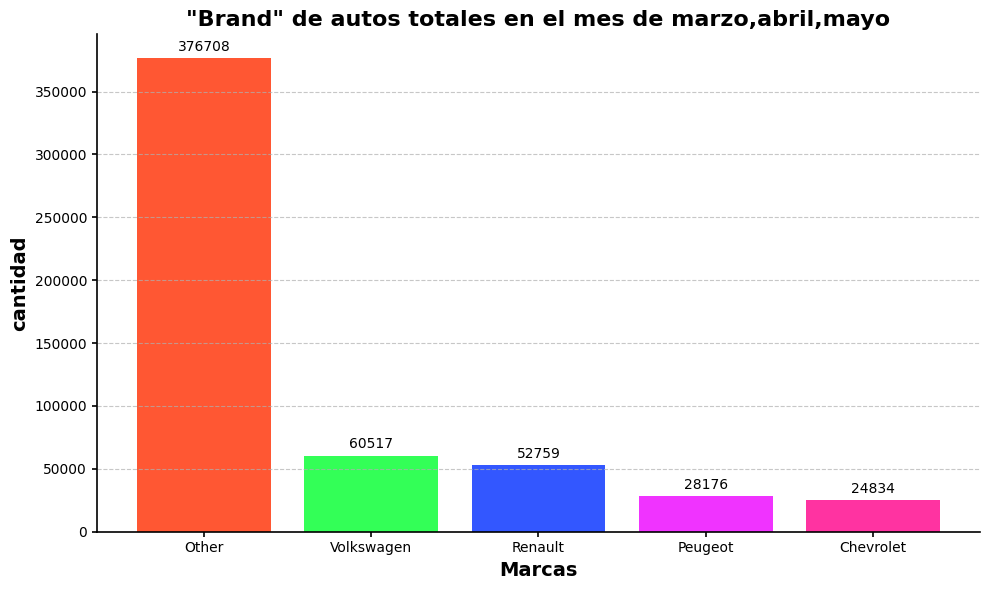

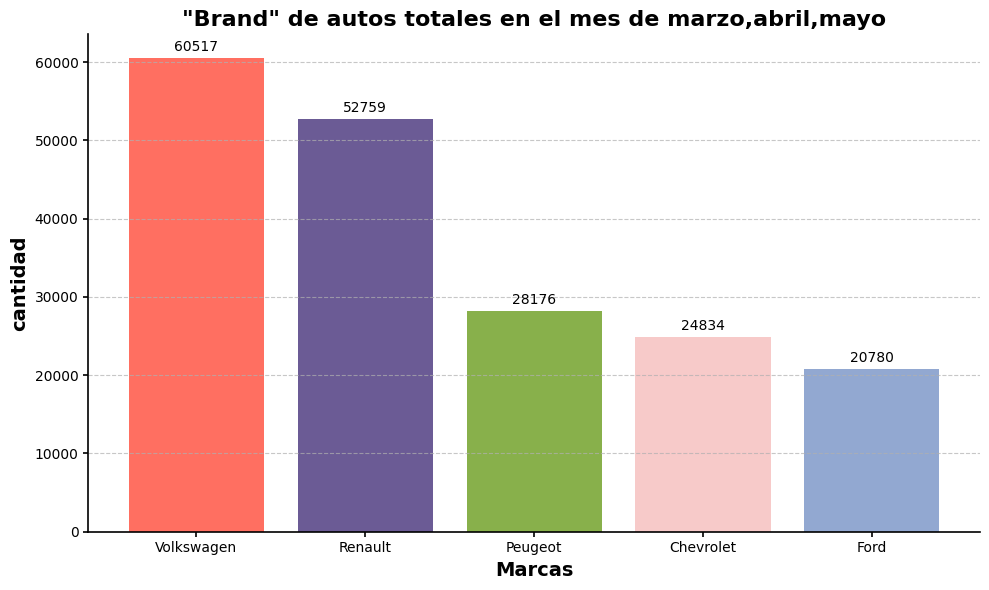

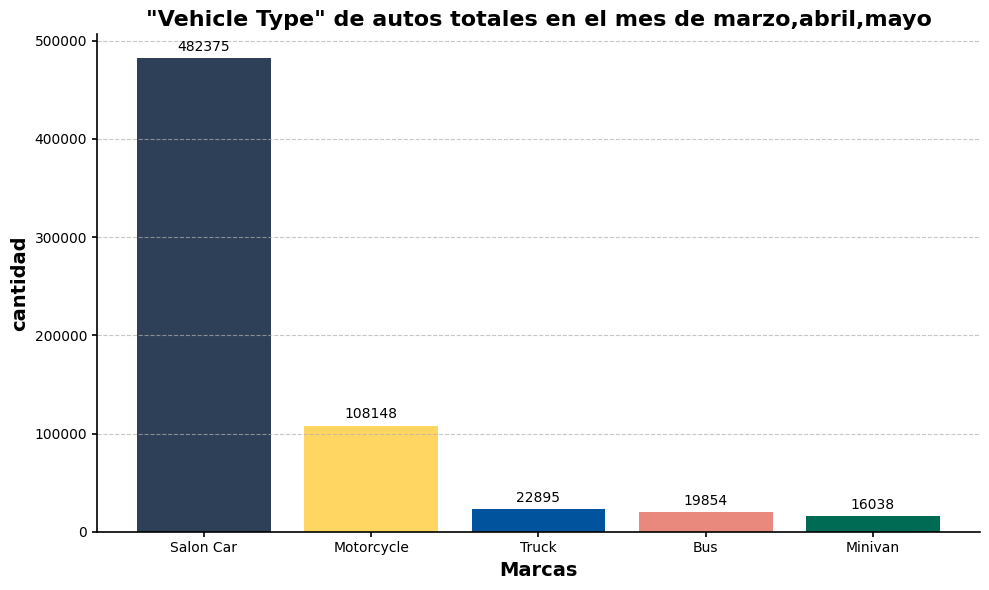

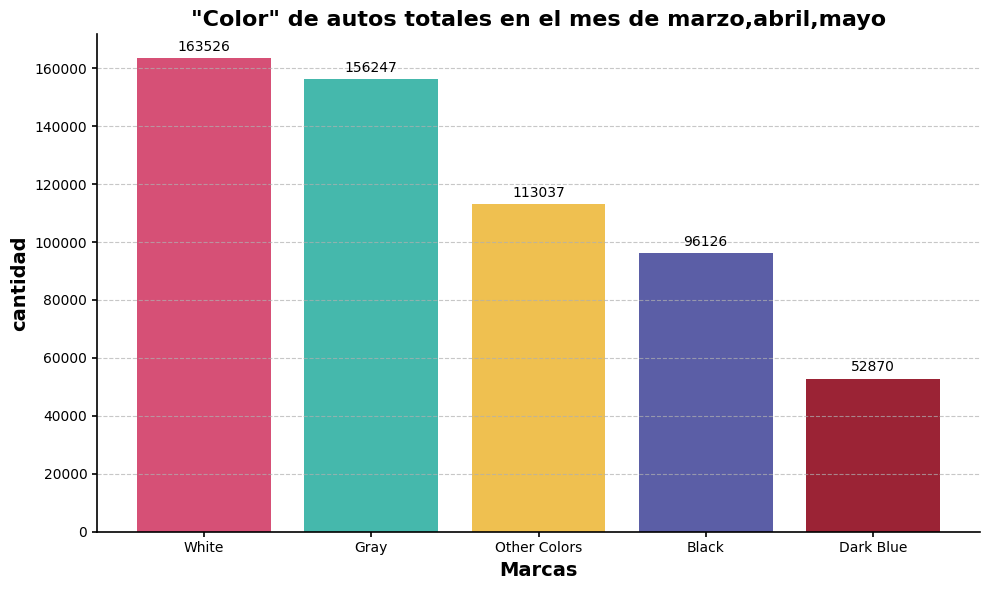

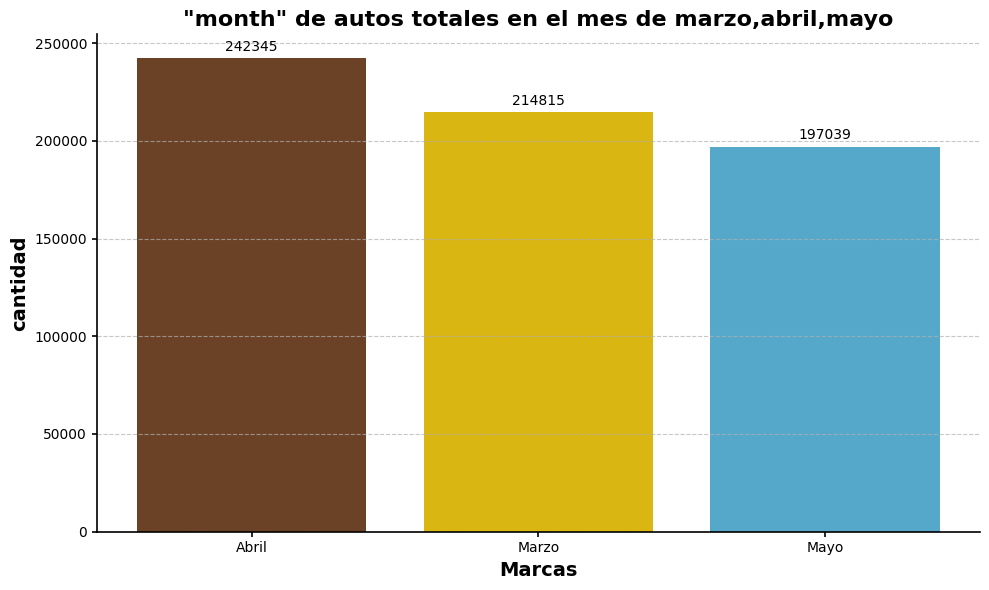

In [ ]:
width=10
high=6

colores1 = ['#FF5733', '#33FF57', '#3357FF', '#F033FF', '#FF33A1']
colores2 = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1']
colores3 = ['#2E4057', '#FFD662', '#00539C', '#E9897E', '#006B54']
colores4 = ['#D65076', '#45B8AC', '#EFC050', '#5B5EA6', '#9B2335']
colores5 = ['#6B4226', '#D9B611', '#56A8CB', '#925D25', '#D65076']

top_5_bar_char(df,"Brand",width,high,colores1)
brand_sin_others=df[df['Brand'] != "Other"]
top_5_bar_char(brand_sin_others,"Brand",width,high,colores2)
top_5_bar_char(df,"Vehicle Type",width,high,colores3)
top_5_bar_char(df,"Color",width,high,colores4)
top_5_bar_char(df,"month",width,high,colores5)

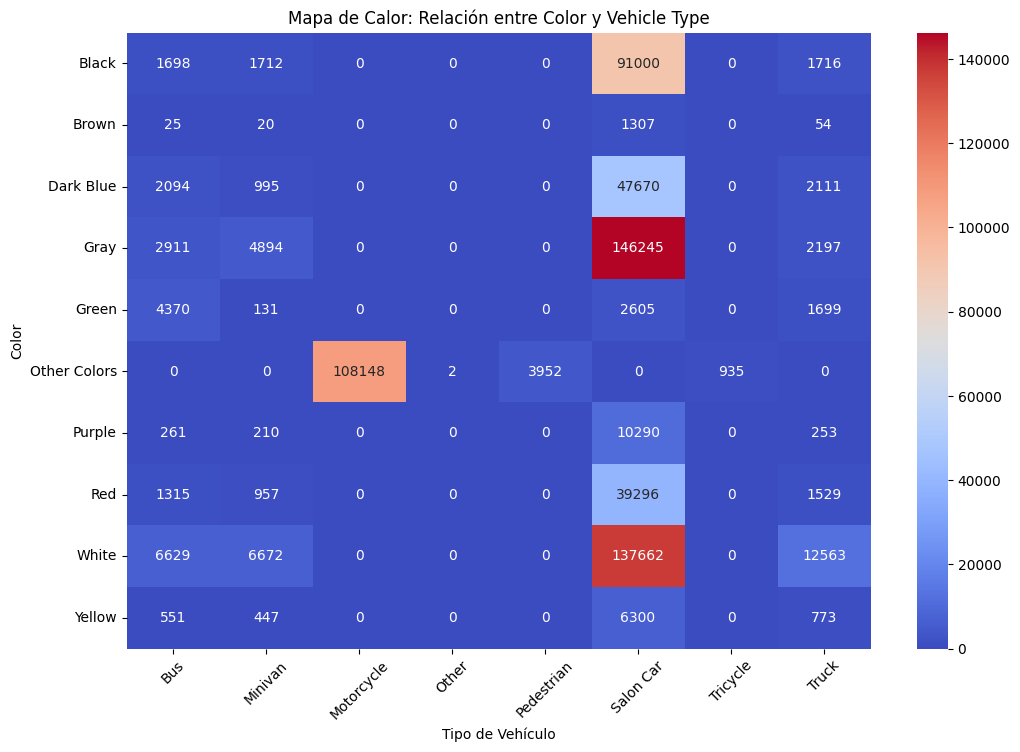

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de contingencia entre las variables categóricas 'Color' y 'Vehicle Type'
contingency_table = pd.crosstab(df['Color'], df['Vehicle Type'])

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, cmap='coolwarm', annot=True, fmt='d')
plt.title('Mapa de Calor: Relación entre Color y Vehicle Type')
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Color')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Se observa que la mayor relacion de autos es con el tipo Salon Car y el color Gray, con una cantidad de 146mil aproximadamente.
Y por otro lado la relacion mas baja sin contar el nulo es de un 20 entre la Minivan y el color Brown.

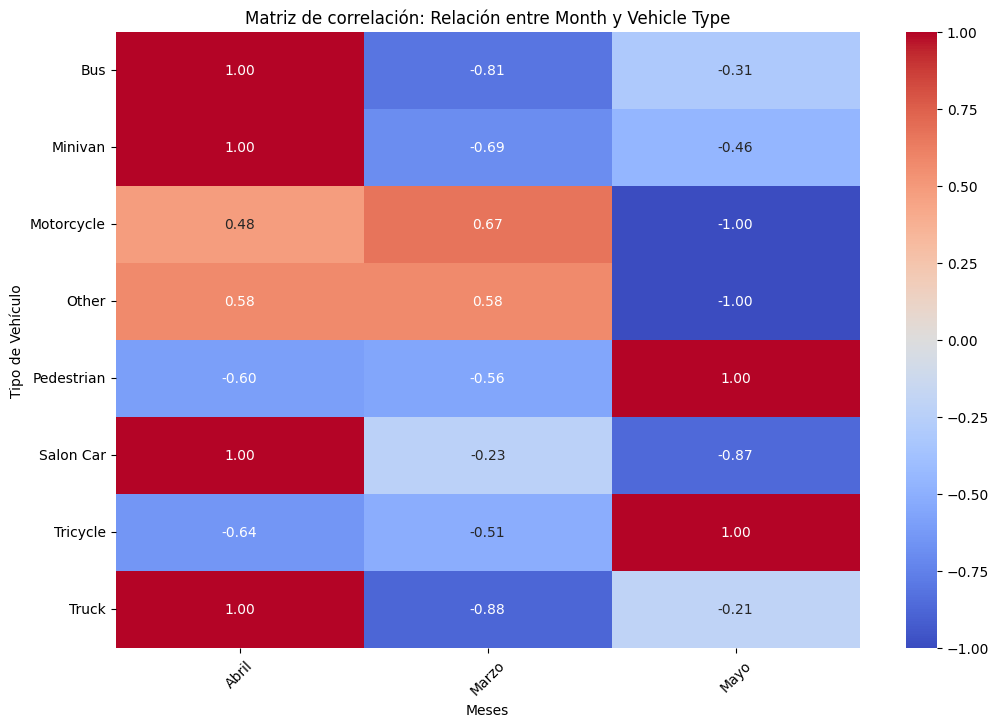

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una tabla de contingencia entre las variables categóricas 'Month' y 'Vehicle Type'
contingency_table = pd.crosstab(df['month'], df['Vehicle Type'])

# Normalizar los valores de la tabla de contingencia para que estén en el rango [-1, 1]
normalized_table = (contingency_table - contingency_table.mean()) / contingency_table.std()
normalized_table[normalized_table > 1] = 1  # Establecer valores mayores a 1 a 1
normalized_table[normalized_table < -1] = -1  # Establecer valores menores a -1 a -1

# Trasponer la tabla de contingencia normalizada
normalized_table = normalized_table.T

# Crear el mapa de calor con los meses en el eje X y la escala de -1 a 1
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_table, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Matriz de correlación: Relación entre Month y Vehicle Type')
plt.xlabel('Meses')
plt.ylabel('Tipo de Vehículo')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

En la Matriz de correlación el coeficiente indica que la relacion positiva mas alta se presenta en 6 casos, pero con mas presencia en el mes de Abril. Y la relacion negativa mas alta se situa en el mes de mayo con dos casos.

<ipython-input-5-2ab9a77dd401>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_brands, x='Total', y='Brand', palette='Set1')


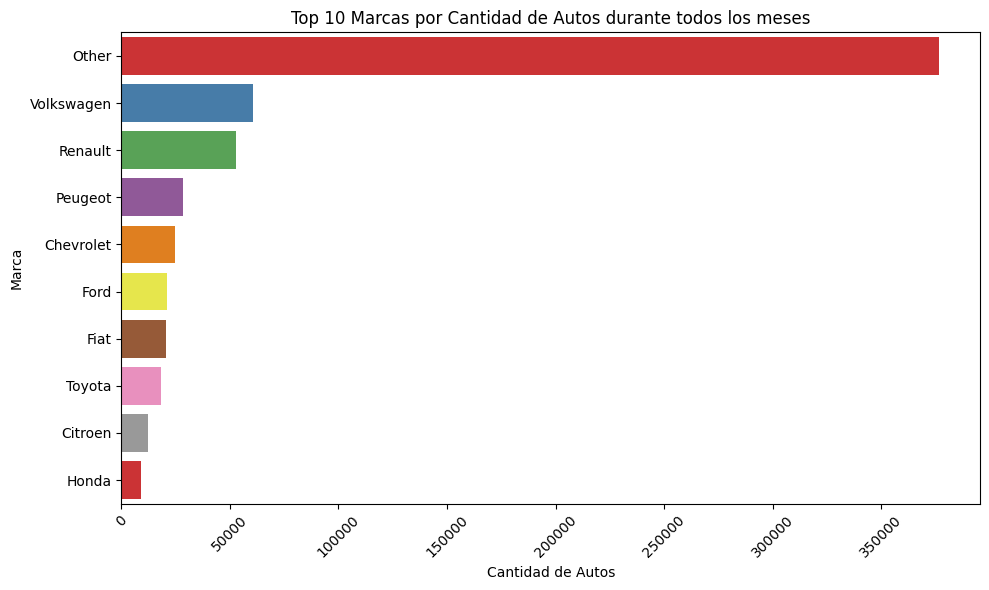

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular el conteo total de autos por marca
count_by_brand = df['Brand'].value_counts().reset_index()
count_by_brand.columns = ['Brand', 'Total']

# Ordenar las marcas por el total de autos en orden descendente
count_by_brand = count_by_brand.sort_values(by='Total', ascending=False)

# Tomar las primeras 10 marcas en el ranking
top_10_brands = count_by_brand.head(10)

# Crear el gráfico de ranking de marcas para las primeras 10 marcas
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_brands, x='Total', y='Brand', palette='Set1')
plt.title('Top 10 Marcas por Cantidad de Autos durante todos los meses')
plt.xlabel('Cantidad de Autos')
plt.ylabel('Marca')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el grafico de barras se presenta el ranking top 10 de las marcas con mas presencia durante todos los meses. Ubicando en el primer lugar a las marcas desconocidas, segundo Volkswagen, y tercer lugar Renault.

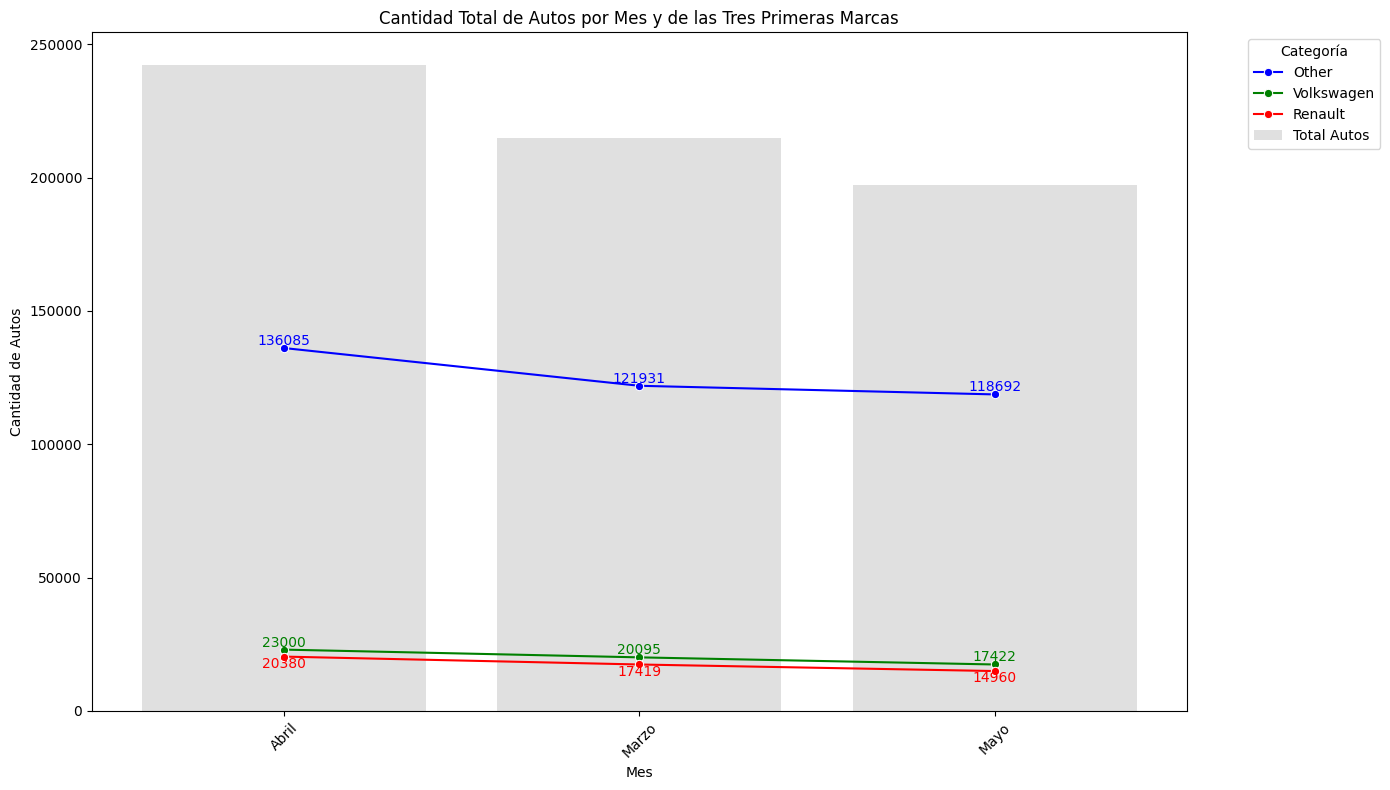

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la cantidad total de autos por mes
total_cars_by_month = df['month'].value_counts().reset_index()
total_cars_by_month.columns = ['month', 'Total']

# Calcular la cantidad total de autos por marca
total_cars_by_brand = df['Brand'].value_counts().reset_index()
total_cars_by_brand.columns = ['Brand', 'Total']

# Identificar las tres marcas con mayor cantidad de autos
top_3_brands = total_cars_by_brand.head(3)['Brand']

# Calcular la cantidad de autos por mes para las tres primeras marcas
count_by_brand_month = df[df['Brand'].isin(top_3_brands)].groupby(['month', 'Brand']).size().reset_index(name='Count')

# Crear el gráfico combinado
plt.figure(figsize=(14, 8))

# Gráfico de barras para la cantidad total de autos por mes
sns.barplot(data=total_cars_by_month, x='month', y='Total', color='lightgray', alpha=0.7, label='Total Autos')

# Gráficos de líneas para las tres primeras marcas
colors = ['b', 'g', 'r']

for i, brand in enumerate(top_3_brands):
    brand_data = count_by_brand_month[count_by_brand_month['Brand'] == brand]
    sns.lineplot(data=brand_data, x='month', y='Count', marker='o', color=colors[i], label=brand)
    for j, (x, y) in enumerate(zip(brand_data['month'], brand_data['Count'])):
        # Posicionar etiquetas: primera marca (arriba), segunda marca (arriba), tercera marca (abajo)
        if i == 0:
            va = 'bottom'
            offset = 10
        elif i == 1:
            va = 'bottom'
            offset = 10
        else:
            va = 'top'
            offset = -10
        plt.text(j, y + offset, str(y), color=colors[i], ha='center', va=va)

# Ajustar la leyenda y los títulos
plt.title('Cantidad Total de Autos por Mes y de las Tres Primeras Marcas')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Autos')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En el grafico se observa el total de autos por mes, y la evolución del top 3 de las marcas con mas presencia. Lo que nos da una idea del volumnen del total en cada mes y su importancia en el total de autos.

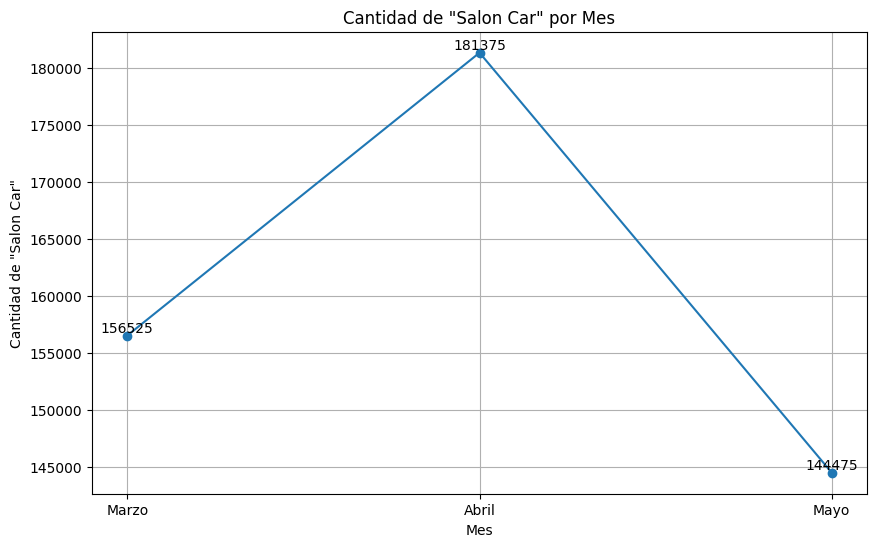

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar el DataFrame para obtener solo los registros de "Salon Car"
salon_car_data = df[df['Vehicle Type'] == 'Salon Car']

# Contar la cantidad de registros de "Salon Car" por mes
salon_car_counts = salon_car_data['month'].value_counts()

# Reordenar los meses
ordered_months = ['Marzo', 'Abril', 'Mayo']
salon_car_counts = salon_car_counts.reindex(ordered_months)

# Crear un gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(salon_car_counts.index, salon_car_counts.values, marker='o', linestyle='-')

# Etiquetas y título
plt.title('Cantidad de "Salon Car" por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de "Salon Car"')

# Personalizar las etiquetas del eje X
plt.xticks(range(len(salon_car_counts.index)), salon_car_counts.index)

# Agregar etiquetas de valores en cada punto de la línea
for i, value in enumerate(salon_car_counts.values):
    plt.text(salon_car_counts.index[i], value, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True)
plt.show()

Se oberva la evolución de la cantidad de autos del tipo de vehiculo "Salon Car" durante los meses registrados, a traves de un grafico lineas.